# EMBER Characterizations Notebook

This notebook contains all the methods for visualizing EMBER measurement data.

## Import libraries

External libraries: `matplotlib`, `numpy`, `scipy`, `pandas`.

In [58]:
# Import internal libraries
import json

# Import custom libraries
import ppf
from ppf import PPFScale

# Import external libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Pick VDDIO (VDDLS) to study

Most experiments operate at some particular VDDLS value. Set that here.

In [59]:
# Set VDDIO (times 10)
vddio = 33

## RRAM FORM statistics

Here, we plot the distribution of WL DAC levels needed to induce FORMing (at VDDLS=3.3V). Then we plot the distribution of the resultant final conductance values after FORMing.

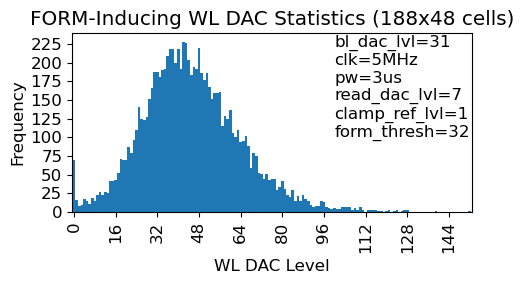

In [60]:
# Load log file
names = ["chip", "time", "addr", "operation", "mask", "wl_dac_lvl", "bsl_dac_lvl", "sa_do", "ignore"]
formdata = pd.read_csv("../data/form.5mhz.188cell.csv", names=names, index_col=False)
formdata.sa_do = formdata.sa_do.shift(-1, fill_value=0)
formdata["nform"] = formdata.sa_do.apply(lambda di: bin(di).count("1"))
formdata = formdata[formdata.operation == "SET"]

# Figure for FORM-inducing WL DAC level statistics
plt.figure(figsize=(5,3))
formdata[formdata.operation == "SET"].groupby("wl_dac_lvl").sum()["nform"].plot.bar(width=1)
plt.title("FORM-Inducing WL DAC Statistics (188x48 cells)")
plt.xlabel("WL DAC Level")
plt.ylabel("Frequency")
plt.text(100, 100, "bl_dac_lvl=31\nclk=5MHz\npw=3us\nread_dac_lvl=7\nclamp_ref_lvl=1\nform_thresh=32")
plt.locator_params(nbins=10)
plt.tight_layout()
plt.savefig("figs/form.wl.stats.pdf")

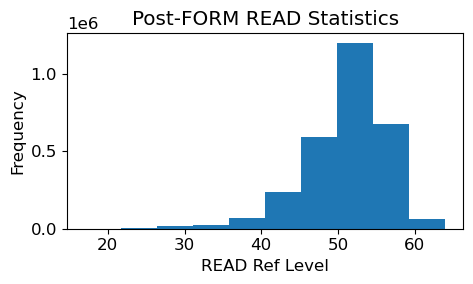

In [61]:
# Load log file
names = ["addr", "time"] + ["read_" + str(i) for i in range(48)]
formreaddata = pd.read_csv("../data/form.csv", names=names, index_col=False, delimiter="\t")
formdata = np.delete(formreaddata[formreaddata.columns[-48:]].values, [19, 29, 38, 43], axis=1).flatten()

# Figure for post-FORM READ statistics
plt.figure(figsize=(5,3))
plt.hist(formdata)
plt.title("Post-FORM READ Statistics")
plt.xlabel("READ Ref Level")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("figs/form.read.stats.pdf")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 38, 39, 49, 51, 54, 57, 59, 61, 62, 63, 64]),
 array([    15,    609,   1329,   8384,  26138, 104101,  54532, 159205,
        256165, 292154, 181129, 353670, 328995, 312595, 145622, 144049,
         49900,  70556,  28332,  17433,   9337,   5259,   2571,   1763,
           626,    768,    290,    165,     84,     51,     31,      9,
             2,      9,      6,      2,      1,      1,      1,      1,
             1,      4,      3,      1,      1,      2,      2]))

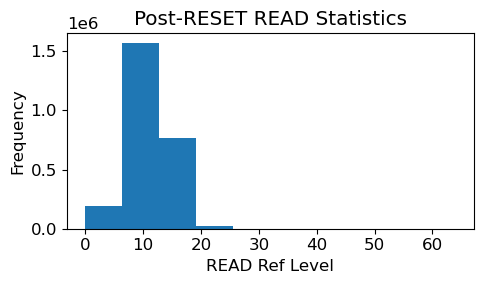

In [62]:
# Load log file
names = ["addr", "time"] + ["read_" + str(i) for i in range(48)]
resetreaddata = pd.read_csv("../readall2.csv", names=names, index_col=False, delimiter="\t")
resetdata = np.delete(resetreaddata[resetreaddata.columns[-48:]].values, [7, 16, 19, 23, 24, 29, 38, 39, 43], axis=1)
resetdata.astype(np.int8).tofile('../readdata3.csv', sep = '\t')
resetdata = resetdata.flatten()

# Figure for post-RESET READ statistics
plt.figure(figsize=(5,3))
plt.hist(resetdata)
plt.title("Post-RESET READ Statistics")
plt.xlabel("READ Ref Level")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("figs/reset.read.stats.pdf")
np.unique(resetdata, return_counts=True)

## Checkerboard demo

Here, we plot programmed checkerboard patterns to demonstrate 1-4bpc programmability. We also indicate the Gray code BER and linear root mean squared error (RMSE) of the measured values from the programmed values.

[[1152    0]
 [   0 1152]]
[[576   0   0   0]
 [  0 576   0   0]
 [  0   0 576   0]
 [  0   0   0 576]]
[[288   0   0   0   0   0   0   0]
 [  1 284   3   0   0   0   0   0]
 [  0   1 287   0   0   0   0   0]
 [  0   0   1 286   1   0   0   0]
 [  0   0   0   0 288   0   0   0]
 [  0   0   0   0   0 288   0   0]
 [  0   0   0   0   0   0 288   0]
 [  0   0   0   0   0   0   0 288]]
[[143   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17 102  25   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3  11 118  12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1  21 101  20   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3  13 117  11   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6 122  16   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7 124  13   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5 121  18   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6 116  22   0   0   0   0   0   0]
 [  0   0   

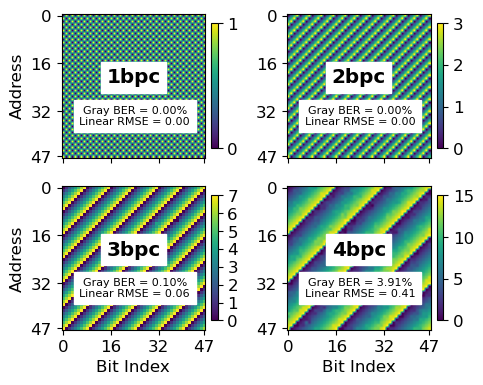

In [63]:
# Produce checkerboard plots for 1-4 bpc
confmats = []
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(5,4))
for bpc in range(1, 5):
  # Subplot
  plt.subplot(220 + bpc)

  # Load data
  names = ["addr", "time"] + ["read_" + str(i) for i in range(48)]
  data = pd.read_csv(f"../data/{bpc}bpc.csv", sep="\t", names=names)

  # Show multi-bit result
  matdata = data[data.columns[-48:]].values[:48]
  im = plt.imshow(matdata, vmin=0, vmax=2**bpc-1)
  cbar = plt.colorbar(im, fraction=0.04, pad=0.04)
  if bpc != 4:
    cbar.set_ticks(range(2**bpc))
  # cbar.set_label("READ Value")
  plt.title(f"{bpc}bpc", x=0.5, y=0.5, verticalalignment="center", horizontalalignment="center", backgroundcolor="white", fontweight="bold")
  if bpc > 2:
    plt.xlabel("Bit Index")
  if bpc % 2 == 1:
    plt.ylabel("Address")

  # Load data into confmat
  confmat = np.zeros(shape=(2**bpc, 2**bpc))
  for i in range(48):
    for j in range(48):
      confmat[(data["addr"][i] + j) % (2**bpc)][matdata[i][j]] += 1
  confmat = confmat.astype(int)
  print(confmat)

  # Symbol error magnitudes
  mae = sum(abs(i - j) * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum()
  rmse = np.sqrt(sum((i - j)**2 * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum())

  # Function to get Gray code string
  getgray = lambda x : format(2**(2**bpc) + x^x//2, f"0{2**bpc-1}b")[1:]

  # Function to get Gray code error rate for each possible symbol confusion
  grayerr = np.array([[sum([int(ic != jc) for ic, jc in zip(getgray(i), getgray(j))]) for i in range(2**bpc)] for j in range(2**bpc)]) / bpc
  # print(grayerr)

  # BER
  ber = (grayerr * confmat).sum() / confmat.sum()
  plt.text(0.5*48, 0.7*48, f"Gray BER = " + format(ber*100, ".2f") + "%\nLinear RMSE = " + format(rmse, ".2f"), fontsize=8, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")

  # Set ticks
  plt.xticks([0,16,32,47])
  plt.yticks([0,16,32,47])
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.tight_layout()
plt.savefig("figs/cb.pdf")
plt.show()

def binary_to_gray_op(n):
  n = int(n, 2)
  n ^= (n >> 1)
  return bin(n)[2:]

## Conductance level visualization

Here, we plot the READ/WRITE level boundaries.

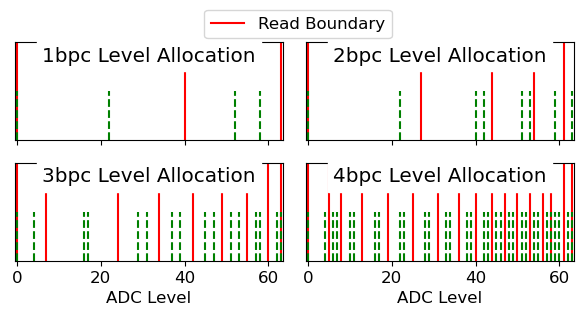

In [64]:
# Plot conductance ranges
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(6,3))
for bpc in range(1, 5):
    # Subplot
    plt.subplot(220 + bpc)
    
    # Load settings
    settings = json.load(open(f"../settings/{bpc}bpc.json"))
    
    # Plot
    plt.axvline(0, 0, 1, color='r', label="Read Boundary" if bpc == 1 else None)
    for level in settings["level_settings"]:
        plt.axvline(level["adc_upper_read_ref_lvl"], 0, 1, color='r')
        plt.axvline(level["adc_lower_write_ref_lvl"], 0, 0.5, color='g', linestyle='--')
        plt.axvline(level["adc_upper_write_ref_lvl"], 0, 0.5, color='g', linestyle='--', label="Write Boundary" if bpc == 1 and level["adc_upper_write_ref_lvl"] == 63 else None)
    plt.xlim(-0.5, 63.5)
    plt.gca().get_yaxis().set_visible(False)
    plt.title(f"{bpc}bpc Level Allocation", backgroundcolor="white", y=1, pad=-14)
    if bpc > 2:
        plt.xlabel("ADC Level")
lgd = fig.legend(loc="center", bbox_to_anchor=(0.51, 1), ncol=2)
plt.tight_layout()
plt.savefig("figs/levels.pdf", bbox_extra_artists=(lgd,), bbox_inches="tight")
plt.show()

## Endurance

Here, we show so endurance cycling data caused by SET/RESET loops (without verify), with READs performed intermittently.

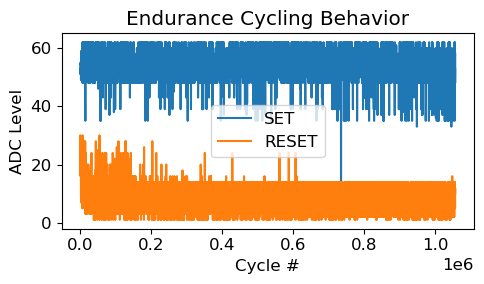

In [65]:
# Load endurance and show an example
names = ["addr", "i", "Cycle #", "RESET", "SET"]
data = pd.read_csv(f"../data/endurance.csv.gz", delimiter='\t', names=names)
data = data[data["addr"] == 10900]
data = data[data["i"] == 9]
plt.rcParams["figure.figsize"] = (5,3)
data.groupby("i").plot("Cycle #", ["SET", "RESET"], title="Endurance Cycling Behavior", ylabel="ADC Level")
plt.tight_layout()
plt.savefig("figs/endurance.pdf")
plt.show()

## Retention data
Here, we show the sigma vs. mu for conductance level allocation, and also plot the conductance distributions of each programmed level at time `t`. 

In [66]:
# Load retention time data
tdata = pd.read_csv("../data/retention2.min.csv.gz")
tdata

,Unnamed: 0,addr,time,lvl,lvli,i,tmin,tmax,timept
0,0,1024,0.000000,6,6,0,4,8,0.0
1,1,1024,0.000000,8,6,1,4,8,0.0
2,2,1024,0.000000,7,6,2,4,8,0.0
3,3,1024,0.000000,5,6,3,4,8,0.0
4,4,1024,0.000000,6,6,4,4,8,0.0
...,...,...,...,...,...,...,...,...,...
113627,62790555,1977,80014.943718,56,58,11,57,61,100000.0
113628,62790556,1977,80014.943718,59,58,12,57,61,100000.0
113629,62790557,1977,80014.943718,58,58,13,57,61,100000.0
113630,62790558,1977,80014.943718,59,58,14,57,61,100000.0


           3             2
3.309e-06 x - 0.0005725 x + 0.01349 x + 1.526
           3            2
2.983e-05 x - 0.003451 x + 0.09626 x + 1.252
           3            2
6.432e-05 x - 0.007314 x + 0.2138 x + 0.7494
           3           2
9.461e-05 x - 0.01069 x + 0.3127 x + 0.3524
           3           2
0.0001272 x - 0.01443 x + 0.4299 x - 0.1005
           3           2
0.0001471 x - 0.01675 x + 0.5016 x - 0.3244
           3           2
0.0001606 x - 0.01825 x + 0.5471 x - 0.5029
           3           2
0.0001763 x - 0.02029 x + 0.6197 x - 0.9493


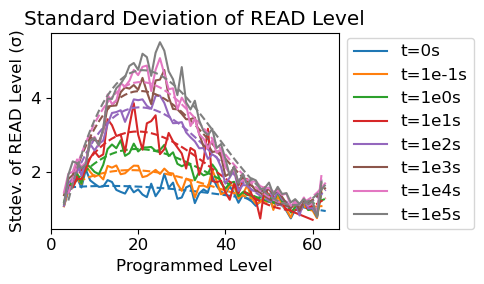

In [67]:
# Plot sigma-mu
%matplotlib inline
times = [0, 0.1, 1, 10, 100, 1000, 10000, 100000]
for time in times:
    sbadata = tdata[(tdata["timept"] == time) & tdata["lvli"].isin(range(0,64,1))].groupby("lvli")["lvl"].std()
    curves = plt.plot(sbadata, label=f't={"{:.0e}".format(time)}s'.replace("e+0","e").replace("e-0","e-").replace("0e0","0"))
    fit = np.polyfit(sbadata.index.values, sbadata.values, 3)
    print(np.poly1d(fit))
    plt.plot(range(4,64), np.poly1d(fit)(range(4,64)), '--', color=curves[0].get_color())
plt.title("Standard Deviation of READ Level")
plt.xlabel("Programmed Level")
plt.ylabel("Stdev. of READ Level (σ)")
lgd = plt.legend(bbox_to_anchor=(1,1.02))
plt.tight_layout()
plt.savefig("figs/sigmamu.pdf", bbox_extra_artists=(lgd,))
plt.show()

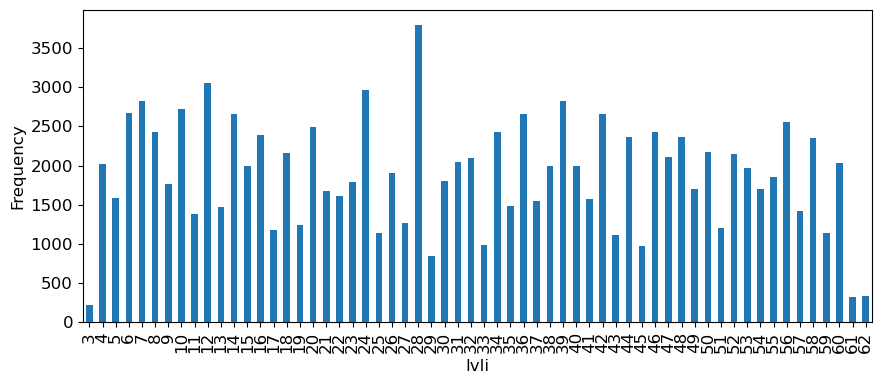

In [68]:
# Plot frequency of each level to check
plt.rcParams["figure.figsize"] = [9, 4]
tdata.groupby("lvli").count()["lvl"].plot.bar()
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

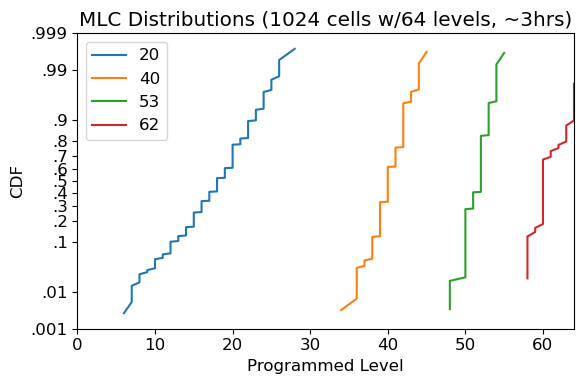

In [69]:
# Show distribution
time = 100
plt.rcParams["figure.figsize"] = [6, 4]
plt.title("MLC Distributions (1024 cells w/64 levels, ~3hrs)")
d = tdata[(tdata["timept"] == time) & tdata["lvli"].isin(range(0,64,1))]
# for i in range(64):
for i in [20, 40, 53, 62]:
# for i in [19, 50]:
    rdata = d[d["lvli"] == i]
    if len(rdata) != 0:
        plt.plot(sorted(rdata["lvl"].values), np.linspace(0+1/len(rdata), 1-1/len(rdata), len(rdata)), label=i)
plt.xlabel("Programmed Level")
plt.ylabel("CDF")
plt.gca().set_yscale("ppf")
plt.xlim(0, 64)
plt.ylim(0.001, 0.999)
plt.tight_layout()
plt.savefig("figs/mlcdist.pdf")
plt.legend()
plt.show()

## SET/RESET final conductance sweeps

We test the effect of pulses with different {VWL, VBL, pw, gi} combos on final conductance gf.

### SET sweep

In [89]:
# SET sweep data
setdata = pd.read_csv(f"../data/setsweep{vddio}_real.csv", delimiter="\t", names=["addr", "t", "vwl", "vbl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
setdata = pd.concat([setdata[["addr","t","vwl","vbl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
# setdata["vbl"] = setdata["vbl"].apply( lambda x: (x & 0b10111) )
setdata

,addr,t,vwl,vbl,pw,gi,gf
0,64975,1.697692e+09,0,0,1,39,40
1,44558,1.697692e+09,0,1,1,8,8
2,56402,1.697692e+09,0,2,1,14,14
3,1098,1.697692e+09,0,3,1,42,43
4,50029,1.697692e+09,0,4,1,51,51
...,...,...,...,...,...,...,...
74613,50999,1.697753e+09,254,27,1,15,59
74614,35678,1.697753e+09,254,28,1,13,62
74615,56431,1.697753e+09,254,29,1,16,59
74616,23422,1.697753e+09,254,30,1,13,62


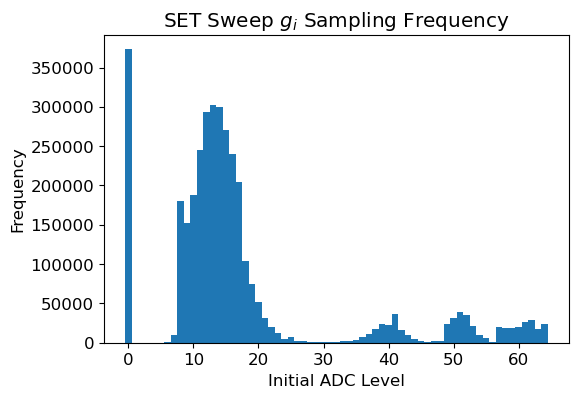

In [90]:
# SET sweep gi sampling frequency check
setdata["gi"].plot.hist(bins=np.arange(-0.5, 65.5))
plt.title("SET Sweep $g_i$ Sampling Frequency")
plt.xlabel("Initial ADC Level")
plt.show()

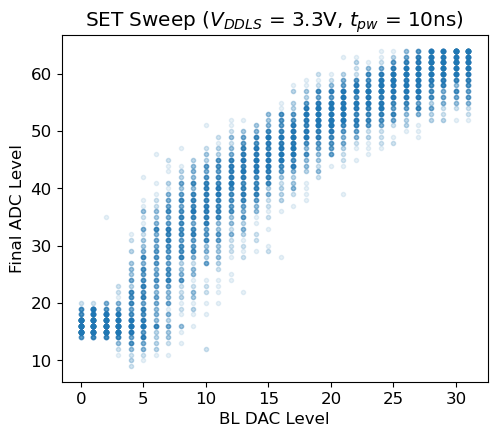

In [96]:
# Plot SET sweep
for pw in setdata["pw"].unique():
    d = setdata[(setdata["gi"].isin(range(15,20))) & (setdata["pw"] == pw) & (setdata["vwl"] == 0)][["vwl","vbl","pw","gf"]]
    fig = plt.figure(figsize=(5.5, 4.5))
    ax = plt.axes()
    ax.set_title(f"SET Sweep ($V_{{DDLS}}$ = {vddio/10}V, $t_{{pw}}$ = {pw*10}ns)", y=1)
    ax.set_xlabel("BL DAC Level")
    ax.set_ylabel("Final ADC Level")
    ax.scatter(d["vbl"], d["gf"], marker=".", alpha=0.1)
    plt.savefig(f"figs/set_sweep_{vddio}_{str(pw).zfill(4)}.png", dpi=300)

### RESET sweep

In [132]:
# RESET sweep data
resetdata = pd.read_csv(f"../data/resetsweep{vddio}_real.csv", delimiter="\t", names=["addr", "t", "vwl", "vsl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
resetdata = pd.concat([resetdata[["addr","t","vwl","vsl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
resetdata

,addr,t,vwl,vsl,pw,gi,gf
0,3580,1.697753e+09,0,0,1,54,53
1,60370,1.697753e+09,0,1,1,51,52
2,62706,1.697753e+09,0,2,1,48,48
3,52994,1.697753e+09,0,3,1,60,60
4,20985,1.697753e+09,0,4,1,45,46
...,...,...,...,...,...,...,...
208168,2086,1.697763e+09,255,31,8,13,16
208169,22454,1.697763e+09,255,31,16,45,21
208170,42440,1.697763e+09,255,31,32,33,21
208171,33256,1.697763e+09,255,31,64,21,23


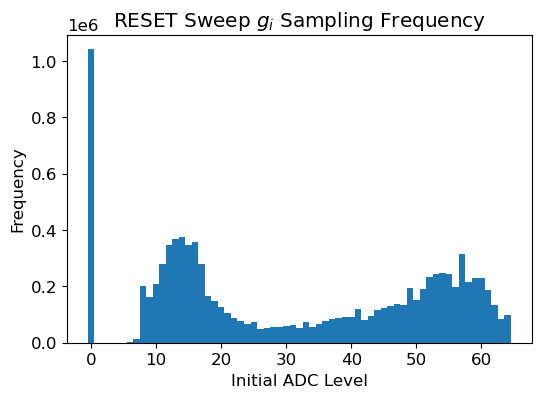

In [135]:
# RESET sweep gi sampling frequency check
plt.figure()
resetdata["gi"].plot.hist(bins=np.arange(-0.5, 65.5))
plt.title("RESET Sweep $g_i$ Sampling Frequency")
plt.xlabel("Initial ADC Level")
plt.show()

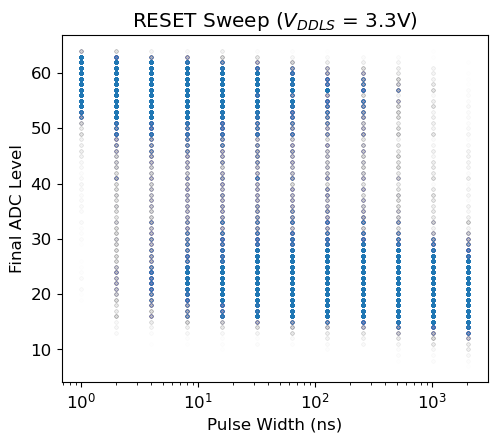

In [140]:
# Plot RESET sweep
d = resetdata[resetdata["gi"].isin(range(55,63)) & resetdata["vsl"].isin([31]) & resetdata["vwl"].isin([255])][["vwl","vsl","pw","gf"]].sample(frac=0.5)
fig = plt.figure(figsize=(5.5, 4.5))
ax = plt.axes()
ax.set_title(f"RESET Sweep ($V_{{DDLS}}$ = {vddio/10}V)", y=1)
ax.set_xlabel("Pulse Width (ns)")
ax.set_xscale("log")
ax.set_ylabel("Final ADC Level")
ax.scatter(d["pw"], d["gf"], marker=".", alpha=0.002)
plt.savefig(f"figs/reset_sweep_{vddio}_{str(pw).zfill(4)}.png", dpi=300)

## SET/RESET Power

In this section, we measure SET/RESET power across different pulse conditions.

### SET Pulse Power

In [76]:
# Load data and convert voltage/current to power
edatas = []
for i in range(3):
    vs = ["vdd", "vdd_dac", "vsa", "vddio", "vddio_dac"]
    edata = pd.read_csv(f"../data/setpower{vddio}_x{i}.csv", delimiter="\t", names=["time", "vwl", "vbl", "pw", "i(vdd)", "i(vdd_dac)", "i(vsa)", "i(vddio)", "i(vddio_dac)", "v(vddio)", "v(vddio_dac)"])
    edata["v(vdd)"] = edata["v(vdd_dac)"] = edata["v(vsa)"] = 0.9
    for v in vs:
      edata[f"p({v})"] = edata[f"v({v})"] * edata[f"i({v})"]
    edata["totpow"] = sum([edata[f"p({v})"] for v in vs])
    edata["n"] = i
    edatas.append(edata)
edata = pd.concat(edatas)
edata

,time,vwl,vbl,pw,i(vdd),i(vdd_dac),i(vsa),i(vddio),i(vddio_dac),v(vddio),...,v(vdd),v(vdd_dac),v(vsa),p(vdd),p(vdd_dac),p(vsa),p(vddio),p(vddio_dac),totpow,n
0,1.686634e+09,0,0,3968,0.000090,0.000092,0.000090,0.001058,0.000389,3.29994,...,0.9,0.9,0.9,0.000081,0.000083,0.000081,0.003492,0.001283,0.005021,0
1,1.686634e+09,0,4,3968,0.000090,0.000091,0.000090,0.001060,0.000389,3.29994,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003499,0.001286,0.005028,0
2,1.686634e+09,0,8,3968,0.000090,0.000092,0.000090,0.001078,0.000388,3.29994,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003556,0.001282,0.005082,0
3,1.686634e+09,0,12,3968,0.000089,0.000091,0.000090,0.001053,0.000389,3.29994,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003475,0.001283,0.005001,0
4,1.686634e+09,0,16,3968,0.000090,0.000091,0.000090,0.001084,0.000389,3.29994,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003577,0.001283,0.005104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.686644e+09,255,16,3968,0.000090,0.000091,0.000062,0.001851,0.000376,3.30005,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006107,0.001242,0.007568,2
149,1.686644e+09,255,20,3968,0.000090,0.000091,0.000062,0.001912,0.000378,3.30005,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006309,0.001248,0.007776,2
150,1.686644e+09,255,24,3968,0.000090,0.000091,0.000062,0.001949,0.000379,3.30005,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006431,0.001251,0.007900,2
151,1.686644e+09,255,28,3968,0.000076,0.000080,0.000062,0.001985,0.000379,3.30005,...,0.9,0.9,0.9,0.000069,0.000072,0.000056,0.006552,0.001252,0.008001,2


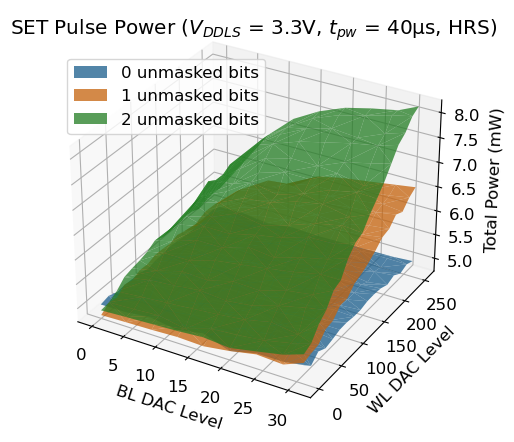

In [77]:
# 3-D plot of pulse power vs. {VWL, VBL, number of bits unmasked}
fig = plt.figure(figsize=(5.5, 4.5))
ax = plt.axes(projection='3d')
ax.set_title(f"SET Pulse Power ($V_{{DDLS}}$ = {vddio/10}V, $t_{{pw}}$ = 40µs, HRS)", y=1)
ax.set_xlabel("BL DAC Level")
ax.set_ylabel("WL DAC Level")
ax.set_zlabel("Total Power (mW)")
for i in range(3):
    e = edata[edata['n'] == i]
    surf = ax.plot_trisurf(e['vbl'], e['vwl'], e['totpow'] * 1000, label=f"{i} unmasked bits", alpha=0.75)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
ax.legend(loc=(0.05, 0.7))
plt.tight_layout()
plt.savefig(f"figs/setpower{vddio}.pdf")
plt.show()

### RESET Pulse Power

In [78]:
# Load data and convert voltage/current to power
edatas = []
for i in range(3):
    vs = ["vdd", "vdd_dac", "vsa", "vddio", "vddio_dac"]
    edata = pd.read_csv(f"../data/resetpower{vddio}_x{i}.csv", delimiter="\t", names=["time", "vwl", "vsl", "pw", "i(vdd)", "i(vdd_dac)", "i(vsa)", "i(vddio)", "i(vddio_dac)", "v(vddio)", "v(vddio_dac)"])
    edata["v(vdd)"] = edata["v(vdd_dac)"] = edata["v(vsa)"] = 0.9
    for v in vs:
      edata[f"p({v})"] = edata[f"v({v})"] * edata[f"i({v})"]
    edata["totpow"] = sum([edata[f"p({v})"] for v in vs])
    edata["n"] = i
    edatas.append(edata)
edata = pd.concat(edatas)
edata

,time,vwl,vsl,pw,i(vdd),i(vdd_dac),i(vsa),i(vddio),i(vddio_dac),v(vddio),...,v(vdd),v(vdd_dac),v(vsa),p(vdd),p(vdd_dac),p(vsa),p(vddio),p(vddio_dac),totpow,n
0,1.686681e+09,0,0,3968,0.000090,0.000092,0.000090,0.001072,0.000389,3.30001,...,0.9,0.9,0.9,0.000081,0.000083,0.000081,0.003536,0.001285,0.005066,0
1,1.686681e+09,0,4,3968,0.000090,0.000092,0.000090,0.001077,0.000389,3.30001,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003555,0.001285,0.005085,0
2,1.686681e+09,0,8,3968,0.000090,0.000092,0.000090,0.001082,0.000390,3.30001,...,0.9,0.9,0.9,0.000081,0.000083,0.000081,0.003570,0.001286,0.005100,0
3,1.686681e+09,0,12,3968,0.000090,0.000091,0.000090,0.001085,0.000390,3.30001,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003582,0.001288,0.005113,0
4,1.686681e+09,0,16,3968,0.000089,0.000091,0.000090,0.001063,0.000389,3.30001,...,0.9,0.9,0.9,0.000081,0.000082,0.000081,0.003509,0.001285,0.005037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.686686e+09,255,16,3968,0.000090,0.000091,0.000062,0.001870,0.000378,3.30003,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006171,0.001247,0.007636,2
90,1.686686e+09,255,20,3968,0.000002,0.000074,0.000062,0.001914,0.000380,3.30003,...,0.9,0.9,0.9,0.000001,0.000067,0.000056,0.006315,0.001254,0.007692,2
91,1.686686e+09,255,24,3968,0.000090,0.000091,0.000062,0.001973,0.000380,3.30003,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006512,0.001253,0.007985,2
92,1.686686e+09,255,28,3968,0.000090,0.000092,0.000062,0.001993,0.000382,3.30003,...,0.9,0.9,0.9,0.000081,0.000082,0.000056,0.006576,0.001261,0.008055,2


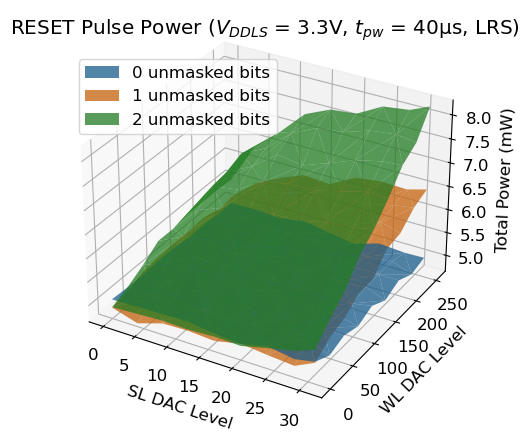

In [79]:
# 3-D plot of pulse power vs. {VWL, VSL, number of bits unmasked}
fig = plt.figure(figsize=(5.5, 4.5))
ax = plt.axes(projection='3d')
ax.set_title(f"RESET Pulse Power ($V_{{DDLS}}$ = {vddio/10}V, $t_{{pw}}$ = 40µs, LRS)", y=1)
ax.set_xlabel("SL DAC Level")
ax.set_ylabel("WL DAC Level")
ax.set_zlabel("Total Power (mW)")
for i in range(3):
    e = edata[edata['n'] == i]
    surf = ax.plot_trisurf(e['vsl'], e['vwl'], e['totpow'] * 1000, label=f"{i} unmasked bits", alpha=0.75)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
ax.legend(loc=(0.05, 0.7))
plt.tight_layout()
plt.savefig(f"figs/resetpower{vddio}.pdf")
plt.show()